# 准备工作
先导入相关的模块，并将数据加载进内存，以便后面进行数据处理

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 数据清洗

### 显示数据的摘要信息

加载数据后，将数据分成数据集和标签集，并展示数据的组成与摘要信息

In [2]:
data = pd.read_csv('./titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 分析数据

通过统计发现`Cabin`字段缺失了绝大部份，而且由于其是枚举字段，无法进行填充，所以直接舍弃；对应的`PassengerId`和`Name`都是指代旅客的唯一编码，这里数据中保留数值类型的,并将其转换为索引；`Ticket`是船票的编号，是唯一编码，同样不将其作为有效特征；`Embarked`作为登船的地点，也是旅客的重要特征，而其作为一个枚举值，需要对其使用`OneHot`编码变成数值型数据

In [5]:
data = data.set_index(['PassengerId'])#将旅客ID设置为索引
data, labels = data.drop('Survived', axis=1), data['Survived']#分离数据集为数据和标签

In [6]:
data.describe()# 显示数值型数据的摘要信息

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1243b4550>,
      dtype=object)

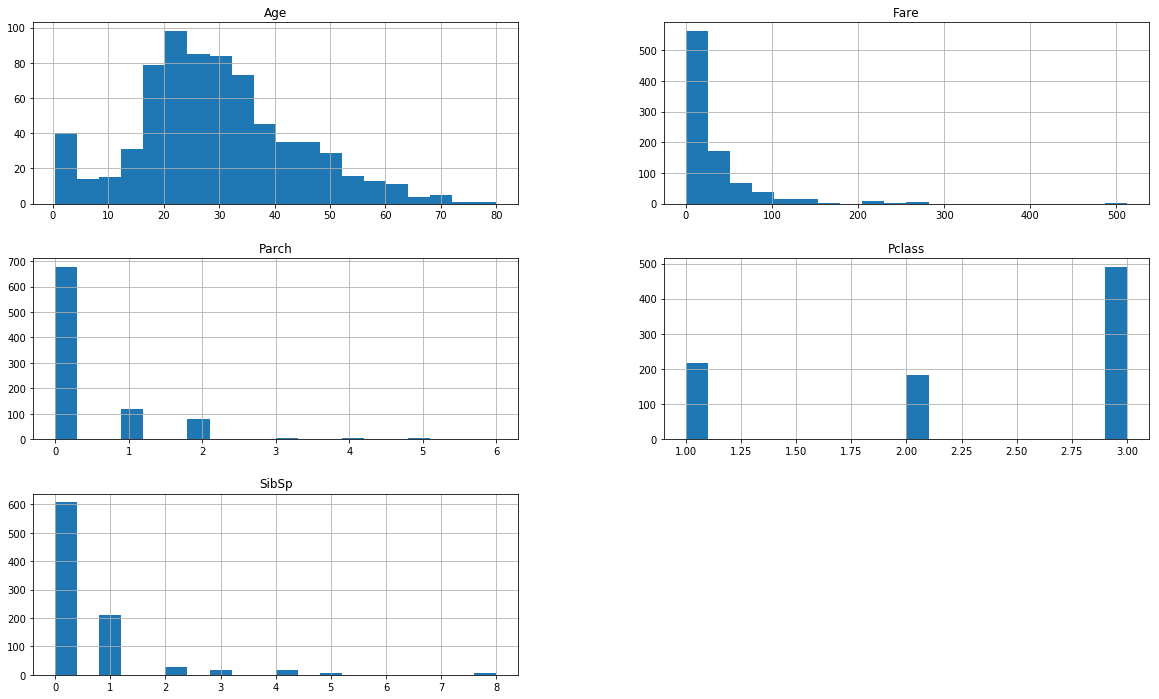

In [31]:
data.hist(figsize=(20, 12), bins=20, align='mid')#显示数据的直方图

从直方图的分布可以看出旅客的年龄主要分布是`18~35`岁之间，而旅费大多低于`50`，父母孩子和兄弟配偶的分布看出大多数人都是单人出游，而旅客使用的多是第三档的票，价格在`100`以下

In [32]:
data.corr()#查看各个特征的相关关系

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


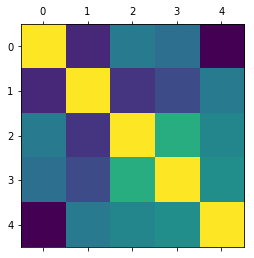

In [34]:
cor = data.corr()#绘制相关性矩阵
plt.matshow(cor)

相关性矩阵中越亮表示正相关性越高，越暗表示负相关性越高；从矩阵中可以看出票的等级`Pclass`和费用`Fare`存在较为明显的负相关性